In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as  plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
import pandas as pd

In [2]:
dataset=fetch_california_housing()
x=dataset['data']

In [18]:
df = pd.DataFrame(dataset.data,columns=dataset.feature_names)
df['target'] = dataset.target
display(df.head())
#print(df.info)
#print(dataset.DESCR)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
print(x.shape)

(20640, 8)


In [21]:
#x=dataset['data'][...,0:1] the below code is also same.
#x=dataset['data'][:,0:1]
x=dataset['data'][:,1:2]
print("\nShape of selected data:", x.shape)  # Will show (n_samples, 1)
print("Feature name for column 1:", dataset.feature_names[1])

# Let's say we want to check column 1 (1)
column_index = 1
column_name = dataset.feature_names[column_index]

# Method 1: Using numpy directly on the data
x = dataset.data[:, column_index]
print(f"\nMethod 1 - For {column_name}:")
print(f"Minimum value: {x.min()}")
print(f"Maximum value: {x.max()}")
y=dataset['target']


Shape of selected data: (20640, 1)
Feature name for column 1: HouseAge

Method 1 - For HouseAge:
Minimum value: 1.0
Maximum value: 52.0


In [ ]:
plt.scatter(x,y)
plt.xlabel('HouseAge')
plt.ylabel('Price')

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20)
print(x_train.shape, x_test.shape)

In [17]:
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

Text(0, 0.5, 'Price')

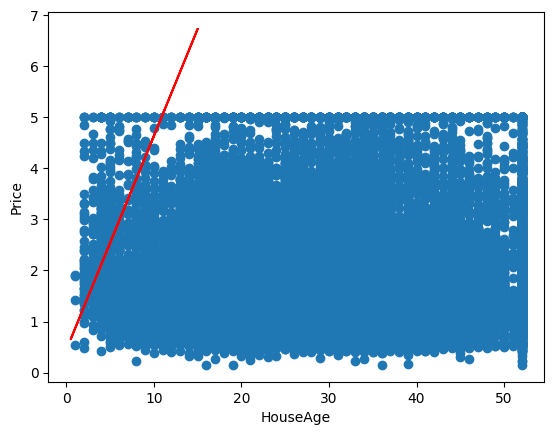

In [25]:
#x=dataset['data'][:,1:2]
plt.scatter(x,y)
plt.plot(x_test,y_pred,color='red')
plt.xlabel('HouseAge')
plt.ylabel('Price')

In [26]:
#y=wx+b
w=model.coef_
b=model.intercept_
print(w,b)

[0.41911336] 0.4445839966806666


In [27]:
print(y_pred[0], w*x_test[0]+b)

5.145359460858933 [5.14535946]


In [28]:
r2_score = r2_score(y_test,y_pred)
mse_error = mean_squared_error(y_test,y_pred)
print(r2_score, mse_error)

0.45209083886035895 0.7006705016695116
